In [ ]:
# pip install contractions

In [ ]:
# pip install -U textblob

In [ ]:
# pip install scattertext

In [91]:
# import the package needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import glob
import re, string, unicodedata
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import contractions
from textblob import TextBlob
##import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import PorterStemmer
##import viz packages
import itertools
import collections
import matplotlib.pyplot as plt
import scattertext as st
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
path = r'D:\Documents\Graduate Studies\Classes\452\Final Project\Movie_reviews_labeled' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

Reviews = pd.concat(li, axis=0, ignore_index=True)

In [11]:
path = r'D:\Documents\Graduate Studies\Classes\452\Final Project\Critic_Reviews_labeled' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, lineterminator='\n', index_col=None, header=0)
    li.append(df)

Critics = pd.concat(li, axis=0, ignore_index=True)

In [12]:
IMDB = Reviews.iloc[:,2:4]
IMDB.head()

,Comment,Emotion
0,****this review may contain spoilers****\n\n'C...,positive
1,"Uma - never better grade 10+, Kristin - good a...",negative
2,The storyline and setting for the book is well...,positive
3,My reasons for seeing this film were as follow...,negative
4,I was fully surprised by how much I enjoyed th...,positive


In [13]:
Metacritics = Critics.iloc[:,6:8]
Metacritics.head()

,Review,Emotion
0,What distinguishes Pattinson in the role is th...,positive
1,"This new Bel Ami has a lot to recommend it, bu...",positive
2,On the whole Bel Ami is highly watchable. ...,positive
3,"Thurman, Meaney and Scott Thomas acquit themse...",positive
4,A good-looking yet curiously tame adaptation o...,positive


In [14]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(Text):
    Text=str(Text)
       
    # Lowering the text
    Text = Text.lower()
    
    # Removing Weblinks
    Text=Text.replace('{html}',"")
    
    # Removing Special characters
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', Text)
    
    #Removing URLs
    rem_url=re.sub(r'http\S+', '',cleantext)
    
    # Removing Numbers
    rem_num = re.sub('[0-9]+', '', rem_url)
    
    # Lemmatization
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    
    # Removing Stopwords.
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    
    return " ".join(filtered_words)

In [15]:
IMDB['Comment_cleaned']=IMDB['Comment'].map(lambda s:preprocess(s)) 
IMDB.head()

,Comment,Emotion,Comment_cleaned
0,****this review may contain spoilers****\n\n'C...,positive,review may contain spoilers come meet wife wor...
1,"Uma - never better grade 10+, Kristin - good a...",negative,uma never better grade kristin good usual grad...
2,The storyline and setting for the book is well...,positive,storyline setting book well known film focuses...
3,My reasons for seeing this film were as follow...,negative,reasons seeing film follows quite like period ...
4,I was fully surprised by how much I enjoyed th...,positive,fully surprised much enjoyed film love book su...


In [16]:
Metacritics['Review_cleaned']=Metacritics['Review'].map(lambda s:preprocess(s)) 
Metacritics.head()

,Review,Emotion,Review_cleaned
0,What distinguishes Pattinson in the role is th...,positive,distinguishes pattinson role sense conveys som...
1,"This new Bel Ami has a lot to recommend it, bu...",positive,new bel ami lot recommend never seems artful s...
2,On the whole Bel Ami is highly watchable. ...,positive,whole bel ami highly watchable
3,"Thurman, Meaney and Scott Thomas acquit themse...",positive,thurman meaney scott thomas acquit well ricci ...
4,A good-looking yet curiously tame adaptation o...,positive,good looking yet curiously tame adaptation sau...


In [17]:
#word lemmatization for IMDB
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
clean_lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_cleantext(text):
    return [clean_lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [20]:
#word lemmatization for IMDB
IMDB['Comment_lem'] = IMDB['Comment_cleaned'].apply(lemmatize_cleantext)
IMDB.head()

,Comment,Emotion,Comment_cleaned,Comment_lem
0,****this review may contain spoilers****\n\n'C...,positive,review may contain spoilers come meet wife wor...,"[review, may, contain, spoiler, come, meet, wi..."
1,"Uma - never better grade 10+, Kristin - good a...",negative,uma never better grade kristin good usual grad...,"[uma, never, better, grade, kristin, good, usu..."
2,The storyline and setting for the book is well...,positive,storyline setting book well known film focuses...,"[storyline, setting, book, well, known, film, ..."
3,My reasons for seeing this film were as follow...,negative,reasons seeing film follows quite like period ...,"[reason, seeing, film, follows, quite, like, p..."
4,I was fully surprised by how much I enjoyed th...,positive,fully surprised much enjoyed film love book su...,"[fully, surprised, much, enjoyed, film, love, ..."


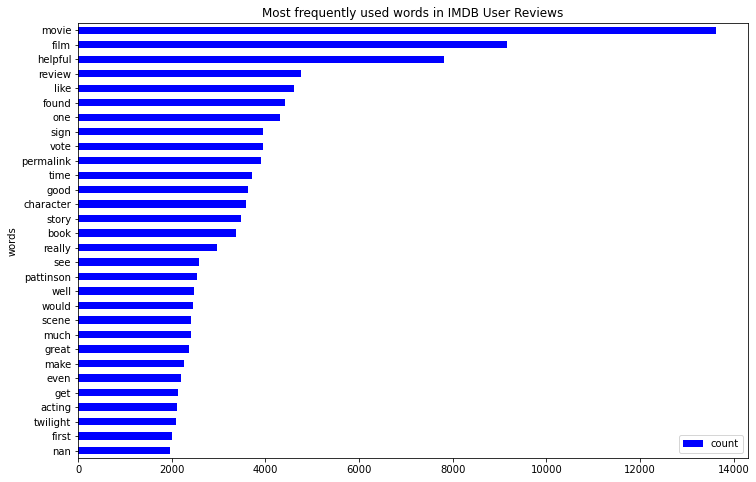

In [21]:
#plotting most common words in IMDB reviews
IMDB_cleaned_comments = list(IMDB['Comment_lem'])
IMDB_comment_list = list(itertools.chain(*IMDB_cleaned_comments))
counts_no = collections.Counter(IMDB_comment_list)
IMDB_clean_comments = pd.DataFrame(counts_no.most_common(30),columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
IMDB_clean_comments.sort_values(by='count').plot.barh(x='words',y='count',ax=ax, color='blue')
ax.set_title("Most frequently used words in IMDB User Reviews")
plt.show()

In [22]:
#word lemmatization for Metacritics
Metacritics['Review_lem'] = Metacritics['Review_cleaned'].apply(lemmatize_cleantext)
Metacritics.head()

,Review,Emotion,Review_cleaned,Review_lem
0,What distinguishes Pattinson in the role is th...,positive,distinguishes pattinson role sense conveys som...,"[distinguishes, pattinson, role, sense, convey..."
1,"This new Bel Ami has a lot to recommend it, bu...",positive,new bel ami lot recommend never seems artful s...,"[new, bel, ami, lot, recommend, never, seems, ..."
2,On the whole Bel Ami is highly watchable. ...,positive,whole bel ami highly watchable,"[whole, bel, ami, highly, watchable]"
3,"Thurman, Meaney and Scott Thomas acquit themse...",positive,thurman meaney scott thomas acquit well ricci ...,"[thurman, meaney, scott, thomas, acquit, well,..."
4,A good-looking yet curiously tame adaptation o...,positive,good looking yet curiously tame adaptation sau...,"[good, looking, yet, curiously, tame, adaptati..."


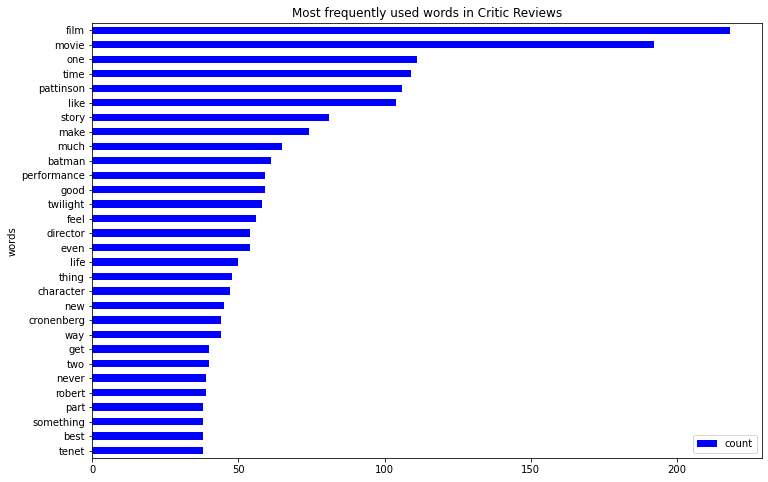

In [23]:
#plotting most common words in metacritic reviews
Metacritics_cleaned_reviews = list(Metacritics['Review_lem'])
Metacritics_review_list = list(itertools.chain(*Metacritics_cleaned_reviews))
counts_no = collections.Counter(Metacritics_review_list)
Metacritics_clean_revs = pd.DataFrame(counts_no.most_common(30),columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
Metacritics_clean_revs.sort_values(by='count').plot.barh(x='words',y='count',ax=ax, color='blue')
ax.set_title("Most frequently used words in Critic Reviews")
plt.show()

In [24]:
#Parsed IMDB df for scattertext visualization - not adding into main IMDB database as content too redundant, creating new df
IMDB_parsed = IMDB.assign(Comment_parse=lambda df: IMDB.Comment_cleaned.apply(st.whitespace_nlp_with_sentences))
IMDB_parsed.head()

,Comment,Emotion,Comment_cleaned,Comment_lem,Comment_parse
0,****this review may contain spoilers****\n\n'C...,positive,review may contain spoilers come meet wife wor...,"[review, may, contain, spoiler, come, meet, wi...","(review, may, contain, spoilers, come, meet, w..."
1,"Uma - never better grade 10+, Kristin - good a...",negative,uma never better grade kristin good usual grad...,"[uma, never, better, grade, kristin, good, usu...","(uma, never, better, grade, kristin, good, usu..."
2,The storyline and setting for the book is well...,positive,storyline setting book well known film focuses...,"[storyline, setting, book, well, known, film, ...","(storyline, setting, book, well, known, film, ..."
3,My reasons for seeing this film were as follow...,negative,reasons seeing film follows quite like period ...,"[reason, seeing, film, follows, quite, like, p...","(reasons, seeing, film, follows, quite, like, ..."
4,I was fully surprised by how much I enjoyed th...,positive,fully surprised much enjoyed film love book su...,"[fully, surprised, much, enjoyed, film, love, ...","(fully, surprised, much, enjoyed, film, love, ..."


In [25]:
#IMDB scattertext plot
corpus = st.CorpusFromParsedDocuments(IMDB_parsed,
                                      category_col='Emotion',
                                      parsed_col='Comment_parse').build().get_unigram_corpus().compact(st.AssociationCompactor(2000))
html = st.produce_scattertext_explorer(corpus,
                                      category='positive',
                                      category_name='positive',
                                      not_category_name='negative',
                                      minimum_term_frequency=5,
                                      width_in_pixels=1000,
                                      transform=st.Scalers.log_scale_standardize)
open('IMDB Sentiment Visualization.html', 'wb').write(html.encode('utf-8'))

4980805

In [26]:
#Parsed Metacritics df for scattertext
Metacritics_parsed = Metacritics.assign(Review_parse=lambda df: Metacritics.Review_cleaned.apply(st.whitespace_nlp_with_sentences))
Metacritics_parsed.head()

,Review,Emotion,Review_cleaned,Review_lem,Review_parse
0,What distinguishes Pattinson in the role is th...,positive,distinguishes pattinson role sense conveys som...,"[distinguishes, pattinson, role, sense, convey...","(distinguishes, pattinson, role, sense, convey..."
1,"This new Bel Ami has a lot to recommend it, bu...",positive,new bel ami lot recommend never seems artful s...,"[new, bel, ami, lot, recommend, never, seems, ...","(new, bel, ami, lot, recommend, never, seems, ..."
2,On the whole Bel Ami is highly watchable. ...,positive,whole bel ami highly watchable,"[whole, bel, ami, highly, watchable]","(whole, bel, ami, highly, watchable)"
3,"Thurman, Meaney and Scott Thomas acquit themse...",positive,thurman meaney scott thomas acquit well ricci ...,"[thurman, meaney, scott, thomas, acquit, well,...","(thurman, meaney, scott, thomas, acquit, well,..."
4,A good-looking yet curiously tame adaptation o...,positive,good looking yet curiously tame adaptation sau...,"[good, looking, yet, curiously, tame, adaptati...","(good, looking, yet, curiously, tame, adaptati..."


In [27]:
#Metacritics scattertext plot
corpus = st.CorpusFromParsedDocuments(Metacritics_parsed,
                                      category_col='Emotion',
                                      parsed_col='Review_parse').build().get_unigram_corpus().compact(st.AssociationCompactor(2000))
html = st.produce_scattertext_explorer(corpus,
                                      category='positive',
                                      category_name='positive',
                                      not_category_name='negative',
                                      minimum_term_frequency=5,
                                      width_in_pixels=1000,
                                      transform=st.Scalers.log_scale_standardize)
open('Metacritics Sentiment Visualization.html', 'wb').write(html.encode('utf-8'))

649604